## Merge de dados e análise de resultados

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

url = "https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true"
experimentos = pd.read_csv(url, compression='zip')
experimentos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [62]:
mapa = {'droga':'composto'}
for coluna in experimentos.columns:
    if coluna != 'droga':
        mapa[coluna] = coluna.replace("-", "")
experimentos.rename(columns=mapa, inplace=True)
experimentos.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Abrindo dataset dos resultados 
O dataset dos resultados do experimentos trazem uma série de mecanismos de ação (efeito farmatológico gerado pela interação bioquímicabioquímica com um certo composto) e trazem se esses mecanismos (alocados nas colunas) foram ativados ou não para cada cultura de célula (representadas pelas linhas). Os mecanismos ativados recebem o valor 1 e os mecanismos não ativados recebem o valor 0. 

In [63]:
resultados = 'https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'
resultados = pd.read_csv(resultados)
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
## Plotando MOAs mais ativados 
moas = resultados.drop('id', axis=1).sum().sort_values(ascending=False)
moas

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
elastase_inhibitor                              6
steroid                                         6
atm_kinase_inhibitor                            6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

## Desafio 1 - Encontrar o top 10 das ações do MOA (inibidor, agonista,...)

In [65]:
# OBJETIVO DESSA CÉLULA: CRIAR UM DICIONÁRIO PYTHON CLASSIFICANDO AS AÇÕES MOAS. AS CHAVES REPRESENTARÃO AS AÇÕES E OS VALORES REPRESENTARÃO OS MOAS ATRAVÉS DE UMA LISTA

classes_moas = []
for moa in resultados.columns:
    if '_' in moa:
        moa = moa[::-1]
        last_underline_index = moa.index('_')
        last_underline_index = len(moa) - last_underline_index
        moa = moa[::-1]
        classes_moas.append(moa[last_underline_index:]) 
    else:
        classes_moas.append(moa)
classes_moas = list(set(classes_moas))
classes_moas.remove('b')
classes_moas.remove('id')
acoes_moas_ativadas = []

for classe in classes_moas:
    classe_list = [str(classe)]
    for moa in resultados.columns:
        if classe in moa:
            if classe not in ['b', 'id']:
                if classe == 'agonist':
                    if 'antagonist' not in moa:
                        classe_list.append(moa)
                elif f'{classe}_' not in moa:
                    classe_list.append(moa)
                elif '_' not in moa:
                    classe_list.append(moa)

    acoes_moas_ativadas.append(classe_list)

    classificacao_moas = {}
for acao in acoes_moas_ativadas:
    classificacao_moas[acao[0]] = acao[1:]
classificacao_moas

{'antiarrhythmic': ['antiarrhythmic'],
 'antibiotic': ['antibiotic'],
 'inhibitor': ['5-alpha_reductase_inhibitor',
  '11-beta-hsd1_inhibitor',
  'acat_inhibitor',
  'acetylcholinesterase_inhibitor',
  'akt_inhibitor',
  'aldehyde_dehydrogenase_inhibitor',
  'alk_inhibitor',
  'angiogenesis_inhibitor',
  'aromatase_inhibitor',
  'atm_kinase_inhibitor',
  'atp_synthase_inhibitor',
  'atpase_inhibitor',
  'atr_kinase_inhibitor',
  'aurora_kinase_inhibitor',
  'autotaxin_inhibitor',
  'bacterial_30s_ribosomal_subunit_inhibitor',
  'bacterial_50s_ribosomal_subunit_inhibitor',
  'bacterial_cell_wall_synthesis_inhibitor',
  'bacterial_dna_gyrase_inhibitor',
  'bacterial_dna_inhibitor',
  'bacterial_membrane_integrity_inhibitor',
  'bcl_inhibitor',
  'bcr-abl_inhibitor',
  'beta_amyloid_inhibitor',
  'bromodomain_inhibitor',
  'btk_inhibitor',
  'calcineurin_inhibitor',
  'carbonic_anhydrase_inhibitor',
  'casein_kinase_inhibitor',
  'catechol_o_methyltransferase_inhibitor',
  'cdk_inhibitor'

In [66]:
# OBJETIVO DESSA CÉLULA: PEGAR O DICIONÁRIO GERADO A CIMA 

def remove_repetidos(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l

acoes_moa_data_frame = []
for classe in classificacao_moas:
    for key in classificacao_moas:
        moas = classificacao_moas[key]
        qtd = 0
        for moa in moas:
            qtd += resultados[moa].sum()
        acoes_moa_data_frame.append([key,qtd])
acoes_moa_data_frame = remove_repetidos(acoes_moa_data_frame)
acoes_moa_data_frame = pd.DataFrame(acoes_moa_data_frame, columns=['Ação','Quantidade'])
acoes_moa_data_frame = acoes_moa_data_frame.sort_values(ascending=False, by='Quantidade').reset_index(drop=True).head(10)
acoes_moa_data_frame

,Ação,Quantidade
0,inhibitor,9693
1,antagonist,3449
2,agonist,2330
3,blocker,323
4,agent,150
5,activator,115
6,local,80
7,antioxidant,73
8,anti-inflammatory,73
9,immunosuppressant,73


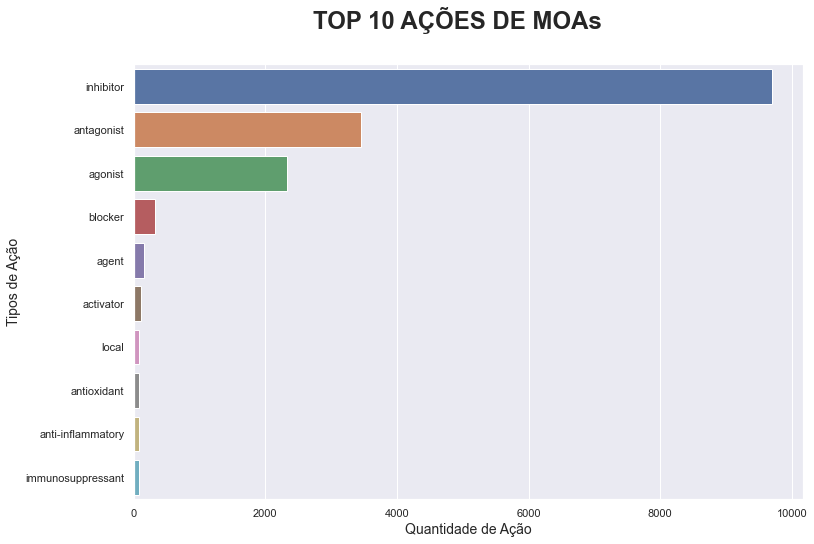

In [67]:
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=acoes_moa_data_frame, x='Quantidade', y='Ação')

fig.suptitle('TOP 10 AÇÕES DE MOAs', fontsize=24, fontweight = 'bold')
ax.set_xlabel('Quantidade de Ação',  fontsize=14)
ax.set_ylabel('Tipos de Ação',  fontsize=14)

plt.show()

### Merge com duas bases de dados 
O método merge do pandas permite a combinação de datasets

In [68]:
### criando a coluna n_moa que representa o número de moas ativados para cada cultura .
resultados['n_moa'] = resultados.drop('id', axis=1).sum(axis=1)

### criando a coluna moa_ativo que representa se um moa foi ativo ou não.
resultados['moa_ativo'] = resultados['n_moa'] !=0

### Combinando a coluna n_moa com o dataset dos experimentos usando o id como chave (elemento em comum para a combinação) 
dados_combinados = pd.merge(experimentos[['id','tratamento','tempo', 'dose', 'composto']], resultados[['id','n_moa','moa_ativo']], on='id')
dados_combinados

,id,tratamento,tempo,dose,composto,n_moa,moa_ativo
0,id_000644bb2,com_droga,24,D1,b68db1d53,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,1,True
...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,1,True
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,1,True
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0,False
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,1,True


## Desafio 02 - Criar a coluna eh_controle para quando na linha tratamento == com_controle.

In [69]:
experimentos['eh_controle'] = (experimentos['tratamento'] == 'com_controle').astype(int)
experimentos.tail(10)[['tratamento', 'eh_controle']]

,tratamento,eh_controle
23804,com_droga,0
23805,com_droga,0
23806,com_droga,0
23807,com_droga,0
23808,com_droga,0
23809,com_droga,0
23810,com_droga,0
23811,com_controle,1
23812,com_droga,0
23813,com_droga,0


## Desafio 03 - Criar três colunas para indicar o tempo 24, 48, 72.

In [70]:
experimentos['24 horas'] = (experimentos['tempo'] == 24).astype(int)
experimentos['48 horas'] = (experimentos['tempo'] == 48).astype(int)
experimentos['72 horas'] = (experimentos['tempo'] == 72).astype(int)
experimentos.tail(10)[['tempo', '24 horas', '48 horas', '72 horas']]

,tempo,24 horas,48 horas,72 horas
23804,24,1,0,0
23805,48,0,1,0
23806,48,0,1,0
23807,48,0,1,0
23808,72,0,0,1
23809,24,1,0,0
23810,24,1,0,0
23811,48,0,1,0
23812,24,1,0,0
23813,72,0,0,1


Com essas colunas adicionadas, para saber quantos experimentos duraram 24 horas, basta pedir a soma da coluna '24 horas'.

In [71]:
experimentos['24 horas'].sum()

7772

In [72]:
experimentos['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

## Desafio 04 - Estudar sobre combinações de DataFrames.
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

## Desafio 05 - Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (escolher uma droga e comparar com controle).

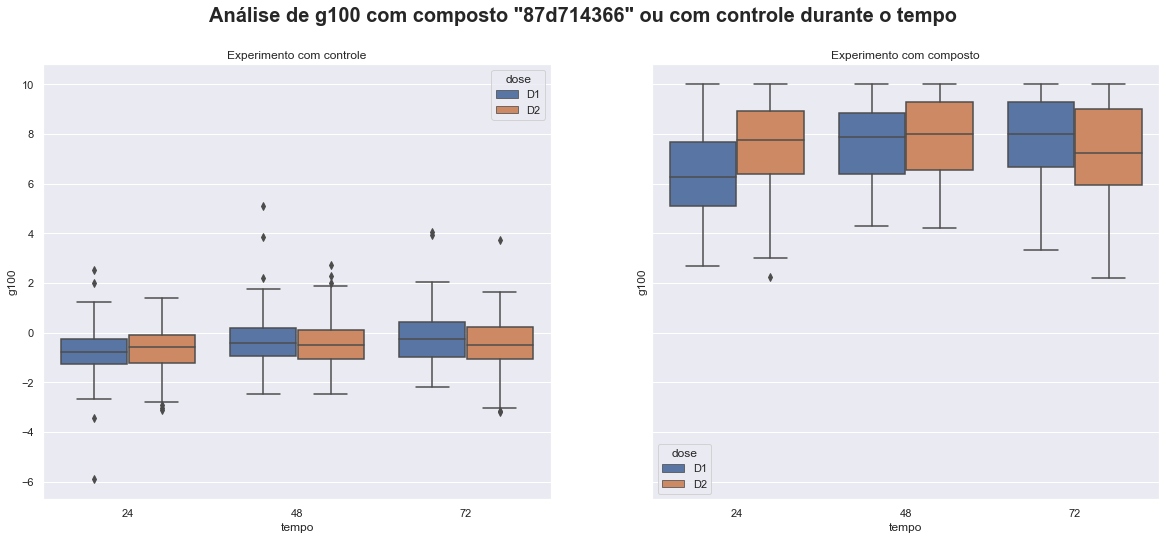

In [73]:
experimento_com_controle = experimentos.query('tratamento == "com_controle"')
experimento_com_composto = experimentos.query("composto == '87d714366'")

fig, ax = plt.subplots(1,2,figsize=(20,8), sharey=True)

sns.boxplot(data=experimento_com_controle, x='tempo', y='g100', hue='dose',ax=ax[0])
ax[0].set_title("Experimento com controle")

sns.boxplot(data=experimento_com_composto, x='tempo', y='g100', hue='dose',ax=ax[1])
ax[1].set_title("Experimento com composto")

fig.suptitle('Análise de g100 com composto "87d714366" ou com controle durante o tempo', fontsize = 20, fontweight = 'bold')
plt.show()

## Desafio 06 - Descobrir se tem algum composto que dependendo da configuração do experimento(dose, tempo), ativa ou não ativa algum MOA.
Classificar experimentos:
* Ativa algum moa apenas na dose D1.
* Ativa algum moa apenas na dose D2.
* Ativa algum moa apenas nas 24 horas.
* Ativa algum moa apenas nas 48 horas.
* Ativa algum moa apenas nas 72 horas. 

Depois citar os compostos de cada classe.

## Desafio 07 - Descobrir se tem algum composto que aumenta a quantidade de MOAs ao longo do tempo.
Espera-se que um remédio desempenhe algumas funções (ative alguns  MOAs no organismo) depois cesse suas atividades, caso ele saia ativando outros MOAs ao longo do tempo, isso pode significar um efeito colateral do remédio. | 

## Desafio 8 - Resumo do que aprendeu com os dados.

Os mecanismos de ação mais ativados nesse estudos são inibidores. 